<a href="https://colab.research.google.com/github/muski10/Deep-learning/blob/main/assessment3(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AlexNet Model

In [81]:
#Importing Necessary Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D 
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split

In [82]:
#Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_width, img_height = 32, 32

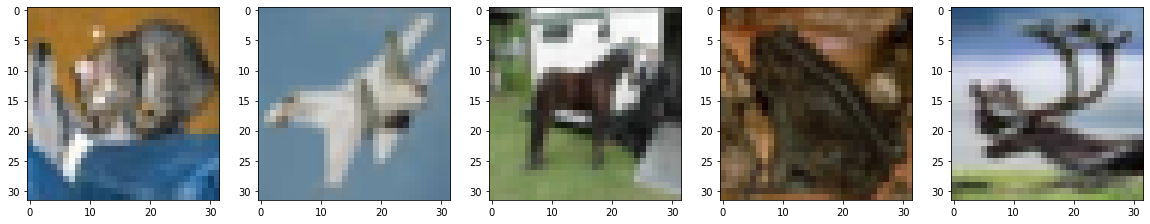

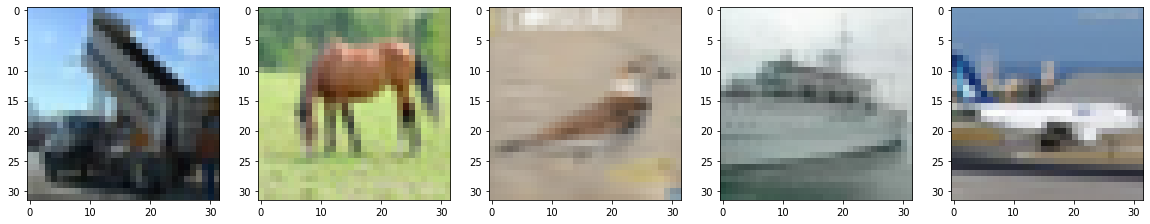

In [83]:
#Display sample input and output images (at least 10 images).
plt.figure(figsize=(20,5))
plt.subplot(151),plt.imshow(x_test[0])
plt.subplot(152),plt.imshow(x_test[10])
plt.subplot(153),plt.imshow(x_test[20])
plt.subplot(154),plt.imshow(x_test[30])
plt.subplot(155),plt.imshow(x_test[40])
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(151),plt.imshow(x_test[50])
plt.subplot(152),plt.imshow(x_test[60])
plt.subplot(153),plt.imshow(x_test[70])
plt.subplot(154),plt.imshow(x_test[80])
plt.subplot(155),plt.imshow(x_test[90])
plt.show()

In [84]:
#Display the total images in the database, size of the image, no of classes in the database.
y_train = (y_train == 2).astype(int)
y_test = (y_test == 2).astype(int)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print('Number of classes in dataset:',len(np.unique(y_test)))

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000
Number of images in x_test 10000
Number of classes in dataset: 2


In [85]:
# Create a AlexNet model and add layers
model = Sequential()

In [86]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

In [87]:
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

In [88]:
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [89]:
# Compile the model
#display training accuracy and loss
model.compile(loss='binary_crossentropy',
 optimizer="adam",
 metrics=['accuracy']
)
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3862 - accuracy: 0.8776
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2540 - accuracy: 0.9054
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2340 - accuracy: 0.9120
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2183 - accuracy: 0.9190
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1971 - accuracy: 0.9255
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1768 - accuracy: 0.9336
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1716 - accuracy: 0.9350
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1583 - accuracy: 0.9406
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1492 - accuracy: 0.9427
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.140

In [92]:
#displaying training accuracy

results = model.evaluate(x_train,y_train,batch_size = 128)
print("train loss, train acc", results)

391/391 [==============================] - 2s 4ms/step - loss: 0.0947 - accuracy: 0.9660
train loss, train acc [0.09472398459911346, 0.9659600257873535]


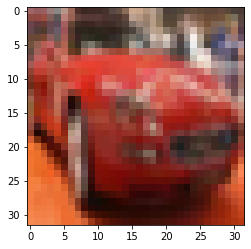

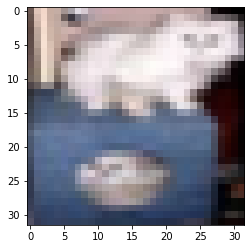

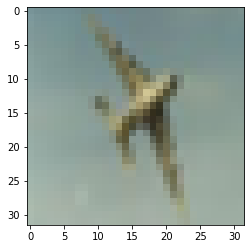

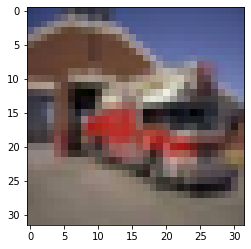

(4, 32, 32, 3)
[[2.26642913e-03]
 [1.21529445e-01]
 [1.36139616e-01]
 [1.73913650e-05]]
[0 0 0 0]


In [90]:
# A few random samples
use_samples = [5, 38, 349, 273]
samples_to_predict = []


# Generate plots for samples
for sample in use_samples:
    # Generate a plot
    shaped = x_train[sample]
    plt.imshow(shaped)
    plt.show()
    # Add sample to array for prediction
    samples_to_predict.append(x_train[sample])

# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

In [91]:
#Display Testing Accuracy

from sklearn import metrics
y_pred = []

# Model configuration
img_width, img_height = 28, 28

y_pred = np.array(y_pred)


# Generate predictions for samples
y_pred = model.predict(x_test)
#print(predictions)
print(y_pred.shape)
# Generate arg maxes for predictions
y_pred = np.argmax(y_pred, axis = 1)

print("Accuracy: ({0:.4f})".format(metrics.accuracy_score(y_test,y_pred)))

(10000, 1)
Accuracy: (0.9000)
